# Q1

https://stackoverflow.com/questions/42592493/displaying-pair-plot-in-pandas-data-frame

https://stackoverflow.com/questions/46383645/seaborn-and-pd-scatter-matrix-plot-color-issues

https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [1]:
# Import statements.

from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the dataset and preparing a dataframe for plotting.

data = sns.load_dataset("iris")


In [4]:
# Reporting the features of the dataset and summarizing them.

data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


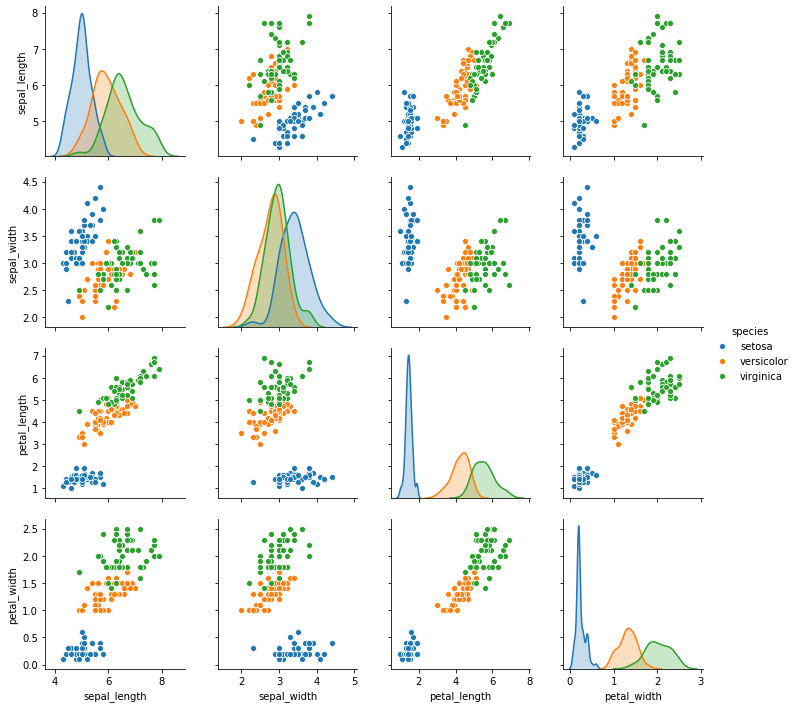

In [5]:
# Plotting the pair plot.

sns.pairplot(data, hue = "species")

# https://www.ritchieng.com/machine-learning-iris-dataset/

# Species are classified as 0, 1, and 2.
# 0 refers to 'setosa'
# 1 refers to 'versicolor'
# 2 refers to 'virginica'

## Data Description:
The iris dataset contains the following 50 samples of 3 different species of iris (i.e. 150 samples in total). For each sample, the following features are measured: sepal length, sepal width, petal length, petal width.


## Separating Classes using a Single Feature:
We look at the plots on the diagonal for considering separation based on just 1 parameter. As we observe, features involving sepal dimensions have a lot of overlap between the three classes. Hence, it is unlikely that we would be able to linearly separate the three classes solely on the basis of either sepal length or sepal width.

On the other hand, by considering either petal width or petal length, we observe that it is possible to separate 'sentosa' from the other two classes. Between 'versicolor' and 'verginica' too, we can linearly separate them but with few missclassifications. But these misclassifications are less in comparision to a similar linear separation done on sepal length or sepal width.


## Separating Classes using Pairs of Features:
While sepal length and sepal width alone have a lot of data overlap between the classes, using either of these classes with either of petal length or petal width again makes it possible to linearly separate the 'sentosa' class from the other two classes with high degree of certainity. As for 'versicolor' and 'verginica', it is possible to linearly separate them, but again with a few misclassifications. But again, these misclassifications are much less as compared to considering sepal dimension individually.

A general trend that can be observed that if we consider any two parameters amongst the four, data points of 'sentosa' are quite distinct from the other two classes. This means that we can linearly separate it from the other two classes.
There exists an overlap between 'versicolor' and 'verginica' to varied degree based on the parameters considered. The overlap is more if both the features are sepal (sepal length and sepal width).

## Using Multiple Features:
We can hypothesize that using more than two features could result clusters which might make all the classes linearly separable with fewer misclassifications. We would explore this in the following questions.

# Q2

In [6]:
# Importing packages and libraries required.

from sklearn.datasets import load_iris
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# import warnings
# warnings.filterwarnings("ignore")
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [7]:
# Loading the dataset and splitting it into 1) Training Set, 2) Validation Set and 3) Test Set.


X, y = load_iris(return_X_y = True)

# Splitting data into 80%(training + validation) and 20% (test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Splitting 80% (training and validation) so that it 60% of total is training and 20% of total is validation.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

# print(len(X_train))
# print(len(y_train))
# print(len(X_val))
# print(len(y_val))
# print(len(X_test))
# print(len(y_test))

In [8]:
# Training a KNN classifier with default parameters and reporting its accuracy on the test set.

clf = KNeighborsClassifier()
y_pred_def = clf.fit(X_train, y_train).predict(X_test)
acc_def = accuracy_score(y_test, y_pred_def)
print("Accuracy of KNN with default parameters is: {}".format(acc_def))

Accuracy of KNN with default parameters is: 0.9666666666666667


Accuracy of KNN with default parameters is 96.67%.

In [9]:
# Training KNN classifier on validation set with multiple parameters to find the best hyperparameters.

k = [1, 5, 10, 15, 20, 25, 30, 35] # Number of Neighbors.

scores = list()
times = list()
for i in k:
    start = time.time()
    clf = KNeighborsClassifier(n_neighbors = i)
    # y_pred = clf.fit(X_train, y_train).predict(X_val)
    clf.fit(X_train, y_train)
    end = time.time()
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    scores.append(acc)
    times.append(end - start)

# print(scores)
# print(times)

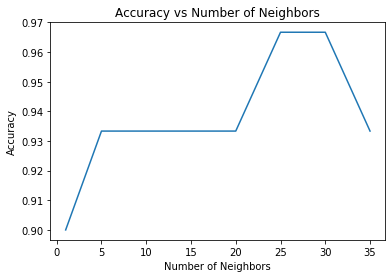

In [11]:
# Plotting Accuracy vs Number of Neighbors for KNN.

plt.plot(k, scores)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Neighbors")
plt.show()

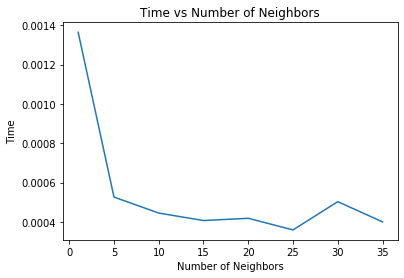

In [12]:
# Plotting Time vs Number of Neighbors for KNN.

plt.plot(k, times)
plt.xlabel("Number of Neighbors")
plt.ylabel("Time")
plt.title("Time vs Number of Neighbors")
plt.show()

Even though we get the same accuracy for k = 25 and k = 30, we argue that the best parameter is k = 25. This is due to the following reasons:

1) In KNN we prefer the number of neighbors to be odd so as to avoid cases where there is a tie.

2) k = 25 is converging faster than k = 30.

3) Higher value of N tend to be more computationally complex and has higher chances misclassifying points on the boundary of the clusters (depending upon the data).

In [14]:
# Training a KNN classifier with most optimum hyperparameter and reporting its accuracy on the test set.

clf = KNeighborsClassifier(n_neighbors = 25)
y_pred = clf.fit(X_train, y_train).predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy for KNN on Test Data is: {}".format(acc))

Accuracy for KNN on Test Data is: 1.0


When KNN was trained with K = 25 and tested on the test data 100% accuracy was reported.

# Q3

https://medium.com/datadriveninvestor/k-fold-cross-validation-for-parameter-tuning-75b6cb3214f
https://scikit-learn.org/stable/modules/cross_validation.html

In [15]:
# Importing packages and libraries required.

from sklearn.datasets import load_iris
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings("ignore") # To ignore a FutureWarning related to value of gamma.

In [16]:
# Loading the dataset and splitting it into 1) Training Set and 2) Test Set.

X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
# Training SVM classifier on validation set with multiple values of C to find the best hyperparameter.

c = [0.1, 0.5, 1, 2, 5, 10, 20, 50]
scores = list()
times = list()

for i in c:
    # print(i)
    start = time.time()
    clf = svm.SVC(C = i, kernel = 'linear')
    score = cross_val_score(clf, X_train, y_train, cv = 10) # 10-fold cross validation.
    scores.append(score.mean())
    end = time.time()
    times.append(end - start)

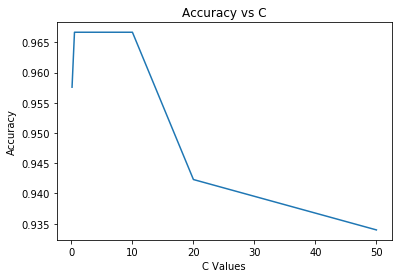

In [21]:
# Plotting Accuracy vs C for SVM.

plt.plot(c, scores)
plt.xlabel("C Values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs C")
plt.show()

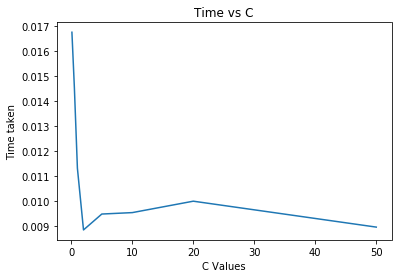

In [22]:
# Plotting Time vs C for SVM.

plt.plot(c, times)
plt.xlabel("C Values")
plt.ylabel("Time taken")
plt.title("Time vs C")
plt.show()

In [24]:
print(scores)

[0.9575757575757576, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9423076923076923, 0.933974358974359]


Extremely low values of C will result in a large number of misclassified labels. A very high value of C will overfit the model. Hence we look for a value of C that is neither too high nor too low. We are getting the same train accuracy for C = 2, 5 and 10. Amongst these, we choose C = 2 as the best parameter because it converged fastest amongst the above. Please refer to answer to Q 5.6 for more detailed reasoning.

In [25]:
# Training a SVM classifier with most optimum hyperparameter and reporting its accuracy on the test set.

clf = svm.SVC(C = 2)
y_pred = clf.fit(X_train, y_train).predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy for SVM on Test Data is: ", acc)

Accuracy for SVM on Test Data is:  1.0


When SVM was trained with C = 2 and tested on the test data 100% accuracy was reported.

# Q4

## 1) Decision Trees

In [26]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# import warnings
# warnings.filterwarnings("ignore")
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
import seaborn as sns
import pandas as pd

In [27]:
# Splitting the data into training and testing.

X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
# Decision Tree Classifier.

from sklearn.tree import DecisionTreeClassifier

dt_params = [3, 5, 10, None]
scores_dt = list()
times_dt = list()

# Training Decision Tree for various values of Maximum Tree Depth.
for i in dt_params:
    clf = DecisionTreeClassifier(max_depth = i, random_state = 42)
    start = time.time()
    score = cross_val_score(clf, X_train, y_train, cv = 10)  # 10-Fold crossvalidation.
    end = time.time()
    scores_dt.append(score.mean())
    times_dt.append(end - start)

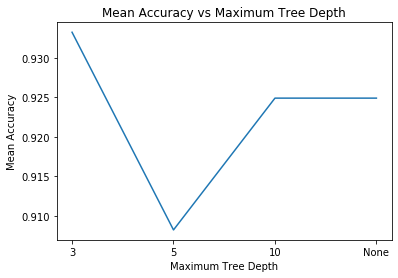

In [29]:
# Plotting Mean Accuracy vs Maximum Tree Depth for Decision Trees.
dt_params_plt = ["3", "5", "10", "None"]
# print(dt_params)
plt.plot(dt_params_plt, scores_dt)
plt.xlabel("Maximum Tree Depth")
plt.ylabel("Mean Accuracy")
plt.title("Mean Accuracy vs Maximum Tree Depth")
plt.show()

We choose max_depth = 3 as the best parameter value as it has the highest accuracy.

In [30]:
# Training and testing Decision Tree with optimum hyperparameters to report test accuracy.

clf_dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
y_pred_dt = clf_dt.fit(X_train, y_train).predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy for Decision Tree on Test Data is: {}".format(acc_dt))

Accuracy for Decision Tree on Test Data is: 1.0


When Decision Tree was trained with max_depth = 3 and tested on the test data 100% accuracy was reported.

## 2) Random Forest

In [31]:
# Random Forest Classifier.

from sklearn.ensemble import RandomForestClassifier

rf_numTrees = [5, 10, 50, 150, 200]
rf_maxDepth = [3, 5, 10, None]

scores_rf = list()
times_rf = list()

# Training Random for various values of Maximum Tree Depth and Number of Trees.
for i in rf_numTrees:
    score = list()
    times = list()
    for j in rf_maxDepth:
        start = time.time()
        # Classifying with different maximum depths and number of trees.
        clf = RandomForestClassifier(random_state = 42, max_depth = j, n_estimators = i)
        val = cross_val_score(clf, X_train, y_train, cv = 10) #10-Fold crossvalidation.
        end = time.time()
        score.append(val.mean())
        times.append(end - start)
    scores_rf.append(score)
    times_rf.append(times)

# print(scores_rf)
# print(len(scores_rf))
# print(len(scores_rf[0]))

In [32]:
# Creating DataFrames for Heat Map.

df = pd.DataFrame(scores_rf, index = rf_numTrees, columns = ["3", "5", "10", "None"])
df_time = pd.DataFrame(times_rf, index = rf_numTrees, columns = ["3", "5", "10", "None"])

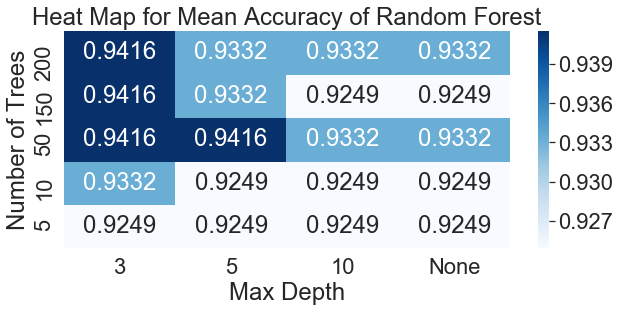

In [33]:
# Plotting Heat Map for Mean Accuracy of Random Forest.

sns.set(font_scale = 2)
plt.figure(figsize = (10, 4))
p = sns.heatmap(df, fmt = '0.4g', annot = True, cmap = "Blues")
# p.set_xlim(0, 4)
p.set_ylim(0, 5)
plt.xlabel("Max Depth")
plt.ylabel("Number of Trees")
plt.title("Heat Map for Mean Accuracy of Random Forest")
plt.show()

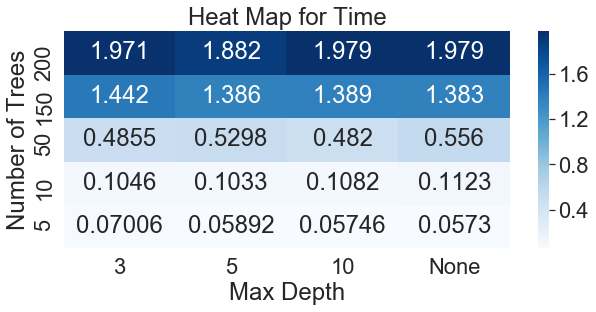

In [34]:
# Plotting Heat Map for Training Time for various hyperparameters of Random Forest.

sns.set(font_scale = 2)
plt.figure(figsize = (10, 4))
p = sns.heatmap(df_time, fmt = '0.4g', annot = True, cmap = "Blues")
# p.set_xlim(0, 4)
p.set_ylim(0, 5)
plt.xlabel("Max Depth")
plt.ylabel("Number of Trees")
plt.title("Heat Map for Time")
plt.show()

https://seaborn.pydata.org/generated/seaborn.heatmap.html 

We choose max_depth = 3 and n_estimators = 50 as the best hyperparameters. This is because even though we had multiple hyperparameters with best accuracy, Random Forest took the least time for these values. Also, since we have small dataset, it is possible that higher values of these paramaters may lead to overfitting of the data.

In [35]:
# Training and testing Random Forest with optimum hyperparameters to report test accuracy.

clf_rf = RandomForestClassifier(random_state = 42, max_depth = 3, n_estimators = 50)
y_pred_rf = clf_rf.fit(X_train, y_train).predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy for Random Forest on Test Data is: {}".format(acc_rf))

Accuracy for Random Forest on Test Data is: 1.0


When Random Forest was trained with max_depth = 3 and n_estimators = 50 and tested on the test data 100% accuracy was reported.

## 3) Gradient Tree Boosting

In [36]:
# Gradient Tree Boosting Classifier.

from sklearn.ensemble import GradientBoostingClassifier

gd_numEst = [5, 10, 50, 150, 200]

scores_gtb = list()
times_gtb = list()

# Training Gradient Tree Boosting for various values of Number of Estimators.
for i in gd_numEst:
    clf = GradientBoostingClassifier(random_state = 42, n_estimators = i)
    start = time.time()
    score = cross_val_score(clf, X_train, y_train, cv = 10)
    end = time.time()
    scores_gtb.append(score.mean())
    times_gtb.append(end - start)

# scores_gtb

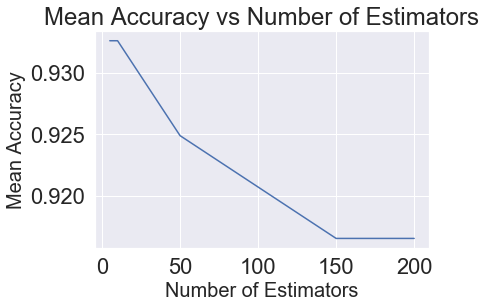

In [37]:
# Plotting Mean Accuracy vs Maximum Tree Depth for Number of Estimators.
plt.plot(gd_numEst, scores_gtb)
plt.xlabel("Number of Estimators", fontsize = 20)
plt.ylabel("Mean Accuracy", fontsize = 20)
plt.title("Mean Accuracy vs Number of Estimators")
plt.show()

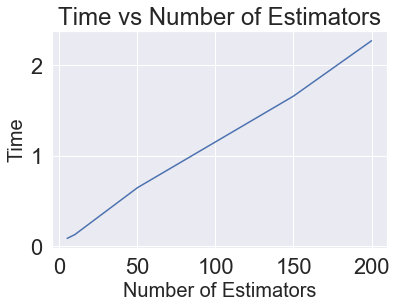

In [38]:
# Plotting Time vs Maximum Tree Depth for Number of Estimators.
plt.plot(gd_numEst, times_gtb)
plt.xlabel("Number of Estimators", fontsize = 20)
plt.ylabel("Time", fontsize = 20)
plt.title("Time vs Number of Estimators")
# plt.rc('font', size = 10)
plt.show()

Best accuracy was attained for n_estimators = 5 and 10.

We choose n_estimators = 5 as the best hyperparameter because:

1) It took lesser time than n_estimators = 10.

2) Since we have a small dataset, a higher value of n_estimator may result in overfitting of the data.

In [40]:
# Training and testing Gradient Tree Boosting with optimum hyperparameters to report test accuracy.

clf_gtb = GradientBoostingClassifier(random_state = 42, n_estimators = 10)
y_pred_gtb = clf_gtb.fit(X_train, y_train).predict(X_test)
acc_gtb = accuracy_score(y_test, y_pred_gtb)
print("Accuracy for Gradient Tree Boosting on Test Data is: {}".format(acc_gtb))

Accuracy for Gradient Tree Boosting on Test Data is: 1.0


When Gradient Tree Boosting was trained with n_estimators = 5 and tested on the test data 100% accuracy was reported.

# Q5

## 5.1

Dataset is split into train and test sets.

Generally, train accuracy is higher than test accuracy (for separate train and test set). This is because training data is used to train the model, so model tries to capture patterns in this data. It is possible that some of the patterns that the model found were specific to the training data, and may not be there elsewhere.

If we use the same data for testing, then our model is again looking at data that it had seen earlier. So it is more likely to classify data correctly. Hence in this case, we may estimate a higher accuracy for our model, which it may not exihibit when encountering data other than that we trained on. So in practice, our model would exhibit lower accuracy than stated which is not desirable. Hence, we try to test the model on data that it has not seen before so that we have a more realistic measure of its performance.
Due to this reason, we split the data into train and test sets.

## 5.2

When we are training a model where it's performance depends on the choice of hyperparameter(s), we want to select the best possible value(s) of hyperparameter(s). For this reason we use validation set. The purpose of validation set is to helps us in avoiding overfitting of the data and in hyperparameter selection. The purpose of test set is to measure the performance of the model.

If we do away with the test set and use validation set for evaluating performace of our model, since as we used validation set to tune hyperparameters, our model is adjusted to perform well on validation set. In such a case, we would be overestimating our accuracy.

If we do away with the validation set and use test set for hyperparameter selection, then again we can deliberately tune our model to perform well on the test set. In this case too we would be overestimating our model's accuracy.

Ideally we want our model to be tested on test set only once. This is because we want to simulate an environment where our model is looking at data that it has not seen before to estimate how good and robust our model is in handling data it has not seen before. Hence, we divided our dataset into three parts:

1) Train Set: To train the model.

2) Validation Set: To find the best value of hyperparameters.

3) Test Set: To evaluate the performance of the model.

## 5.3

The choice of parameter 'k' has a profound impact on the KNN Classifier.

1) We observed that initially increasing the value of k resulted in improved train accuracy. This is because if  value of 'k' is too small, then the model is highly susceptible to noises in the data. That means that it has higher chances of getting influenced by outliers and may result in high cases of misclassifications.

2) We observed that we attained maximum train accuracy for k = 25 and k = 30.

3) Further increasing the value of 'k' resulted a decline in the train accuracy. In this case, there is a chance that points, specially on the boundary of the clusters may be misclassified for sufficiently high values of 'k'. This can be understood as follows: If we increase 'k', we are increasing the number of neighbors we are considering for our voting. If we consider too many neighbors, then there could be cases for points on the boundary of the clusters, where they have more neighbors from a different class than they have from the class that they are a part of. Which would result in the KNN classifier mislabeling them. This however would depend on the structure of the data at hand. Hence, after a certain point, accurcay decreases as 'k' increases. Another aspect to consider is that the model also becomes more computationally complex as 'k' increases.


## 5.4

We observe that in general for both Decision Tree and Random Forset, increasing the max_depth paramater, the accuracy decreased.

For Decision Trees, we noticed sharp dip for max_depth = 5. Though accuracy later increased but it was still less than that for max_depth = 3. It is possible that for max_depth = 5, we have a decision boundry which while splitting the data is resulting in a higher number of misclassified labels. When we are futher increasing max_depth (= 10), it is possible that we no longer have this decision boundary. Hence, we have a sudden dip for max_depth = 5.

In Random Forest, for same number of trees, the accuracy either stayed the same or decreased with an increase in max_depth.

The dataset at hand is a very small dataset, and hence we hypothesize that for small values of max_depth (= 3) only, we were able to train to maximum accuracy. "max_depth" parameter deontes the maximum depth to which the tree will grow. The number of splits increase with the depth, and so does the complexity of the tree. Hence, we can say that with increasing depth the information captured by the tree increases. Since our dataset is small, it is possible that both Decision Tree and Random Forest classifiers trained the data at a shallow depth only (= 3) with high level of accuracy. Any further increase in the max_depth resulted in overfitting of the data and hence a decrease in the accuracy.

## 5.5

In [42]:
print(scores_gtb)

[0.9325757575757574, 0.9325757575757574, 0.9248834498834497, 0.9165501165501164, 0.9165501165501164]


1) From the graph of Mean Accuracy v/s Number of Estimators for Gradient Tree Boosting in Q4, we see that there is an almost linear decrease in the accuracy of the model for an increase in the number of estimators. This can be attributed to the fact that since we have a small dataset, we are reaching optimum accuracy for small values of n_estimator and an increase in its value is resulting in overfitting of the data.

2) For considering relative performance of Gradient Tree Boosting and Random Forest, consider the following. As by default maxi_depth value for Gradient Tree Boosting is 3. Hence we consider Random Forest with same value for max_depth. For Gradient Tree Boosting, we observed that we attained maximum accuracy for n_estimators = 3 and increasing it any further is resulting in overfitting of the model and hence a decrease in the accuracy. For Random Forest classifier for max_depth = 3, we observed that the accuracy initially increased and then stayed the same for the considered values for n_estimators. This can be explained as that for the given values, the Random Forest classifier is splitting data and constructing trees in such a way that we are getting the same accuracy. It is possible that a further increase in n_estimators may result in overfitting of the data.

3) For Gradient Tree Boosting, best accuracy was 93.25%. For Random Forest, best accuracy was 94.16%.

## 5.6

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel

https://www.quora.com/What-are-C-and-gamma-with-regards-to-a-support-vector-machine

https://medium.com/@pushkarmandot/what-is-the-significance-of-c-value-in-support-vector-machine-28224e852c5a

C is refered to as the Regularization parameter. The strength of the regularization is inversely proportional to C.
In a SVM we are searching for two things: a hyperplane with the largest minimum margin, and a hyperplane that correctly separates as many instances as possible. Often, it is not possible of having both. 'C' offers a trade off between these two choices. More formally, it is a measure of how much we want to prioritize misclassification.

If we keep C too small, we make the cost of misclassification low. This would result in a higher number of misclassifications for the sake of a larger margin.

If we keep C too high, we make the cost of missclassification high. This would result in a smaller margin and potential overfitting of the data. The risk of loosing the generality of the model is high.

We want to find a balance between the two things. Hence, a value of C that is too high or too low is undesirable.

We observed that initially as we increased the value of C, our accuracy increased. This is because increasing cost of misclassification resulted in a higher train accuracy. For several values of C, the accuracy was the same. This can be attributed to the distribution of our training data. For these values, it can be argued that the hyperplanes for each case separated the data in similar numbers. However, after that we see decline in the train accuracy with the increase in value of C. This can be attributed to a smaller value of the largest minimum margin in high values of C which result in overfitting and hece result in lower accuracy.